In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.covariance import EllipticEnvelope
import collections
from sklearn import preprocessing

## Loading the data

In [2]:
dataFrame = pd.read_csv('CSC215_P2_Stock_Price.csv')
dataFrame.drop(['Date', 'Adj_Close'], axis=1, inplace=True)
dataFrame['y'] = dataFrame['Close']

In [3]:
dataFrame.head()

,Open,High,Low,Close,Volume,y
0,3.812500,4.156250,3.812500,4.125000,3675600,4.125000
1,4.125000,4.125000,4.000000,4.015625,1077600,4.015625
2,4.000000,4.031250,3.953125,4.000000,437200,4.000000
3,4.000000,4.000000,3.843750,3.843750,1883600,3.843750
4,3.734375,3.734375,3.390625,3.390625,7931600,3.390625


In [4]:
df_y_lstm = dataFrame[['y']].copy()
df_x_lstm = dataFrame.drop(['y'], axis = 1)

In [5]:
df_x_lstm.head()

,Open,High,Low,Close,Volume
0,3.812500,4.156250,3.812500,4.125000,3675600
1,4.125000,4.125000,4.000000,4.015625,1077600
2,4.000000,4.031250,3.953125,4.000000,437200
3,4.000000,4.000000,3.843750,3.843750,1883600
4,3.734375,3.734375,3.390625,3.390625,7931600


In [6]:
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
    
import sklearn
import sklearn.preprocessing
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Volume'] = min_max_scaler.fit_transform(df.Volume.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    return df


df_x_lstm = normalize_data(df_x_lstm)


import numpy as np

def to_sequences(seq_size, data1, data2):
    x = []
    y = []

    for i in range(len(data1)-seq_size):
        #print(i)
        window = data1[i:(i+seq_size)]
        after_window = data2[i+seq_size]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x), np.array(y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
df_x_lstm

,Open,High,Low,Close,Volume
0,0.004378,0.006469,0.006934,0.007408,0.075401
1,0.007031,0.006205,0.008535,0.006482,0.019194
2,0.005970,0.005413,0.008135,0.006350,0.005339
3,0.005970,0.005149,0.007201,0.005027,0.036632
4,0.003714,0.002904,0.003334,0.001191,0.167478
5,0.001725,0.002640,0.003734,0.001588,0.244393
6,0.001990,0.001584,0.000800,0.002117,0.280091
7,0.001459,0.001452,0.003867,0.001984,0.133252
8,0.001725,0.001716,0.004001,0.002778,0.151243
9,0.002521,0.003564,0.005067,0.003043,0.296706


In [8]:
x_lstm = df_x_lstm.as_matrix()
y_lstm = df_y_lstm['y'].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [9]:
SEQUENCE_SIZE = 7
x_lstm_seq_train, y_lstm_seq_train = to_sequences(SEQUENCE_SIZE,x_lstm,y_lstm)
#x_lstm_seq_test,y_lstm_seq_test = to_sequences(SEQUENCE_SIZE,X_test,y_test)

print("Shape of x_lstm_seq_train: {}".format(x_lstm_seq_train.shape))
#print("Shape of x_test: {}".format(x_lstm_seq_test.shape))
print("Shape of y_lstm_seq_train: {}".format(y_lstm_seq_train.shape))
#print("Shape of y_test: {}".format(y_lstm_seq_test.shape))

Shape of x_lstm_seq_train: (4385, 7, 1, 5)
Shape of y_lstm_seq_train: (4385,)


In [10]:
x_lstm_seq_3d = x_lstm_seq_train.reshape(4385,7,5)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x_lstm_seq_3d, y_lstm_seq_train, test_size=0.3, random_state=42)

In [12]:
len(X_train)

3069

In [13]:
len(y_train)

3069

## Sequentializing Data

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

print('Build model...')
model_relu_adam = Sequential()

model_relu_adam.add(LSTM(34,dropout=0.1, recurrent_dropout=0.1, activation = 'relu', input_shape=(SEQUENCE_SIZE, 5)))
#model_relu_adam.add(LSTM(34,dropout=0.1, recurrent_dropout=0.1, activation = 'relu', input_shape=(SEQUENCE_SIZE, 5)))
model_relu_adam.add(Dense(16))
model_relu_adam.add(Dense(5))
model_relu_adam.add(Dense(1))

model_relu_adam.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')

model_relu_adam.fit(X_train,y_train,validation_data=(X_test,y_test), callbacks=[monitor],verbose=2,epochs = 1000)

Build model...
Train...
Train on 3069 samples, validate on 1316 samples
Epoch 1/1000
3069/3069 - 22s - loss: 1187.3242 - val_loss: 151.6676
Epoch 2/1000
3069/3069 - 2s - loss: 123.0224 - val_loss: 35.2020
Epoch 3/1000
3069/3069 - 2s - loss: 67.0478 - val_loss: 20.0918
Epoch 4/1000
3069/3069 - 2s - loss: 42.2313 - val_loss: 26.5769
Epoch 5/1000
3069/3069 - 2s - loss: 31.3510 - val_loss: 39.4430
Epoch 6/1000
3069/3069 - 2s - loss: 24.1815 - val_loss: 29.4740
Epoch 7/1000
3069/3069 - 2s - loss: 22.4623 - val_loss: 32.0967
Epoch 8/1000
3069/3069 - 2s - loss: 23.8444 - val_loss: 26.6859
Epoch 00008: early stopping


Score_relu_adam_train (RMSE): 5.683949947357178
Score_relu_adam_test (RMSE): 5.512479305267334


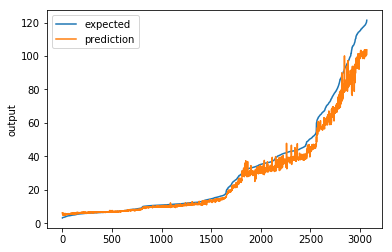

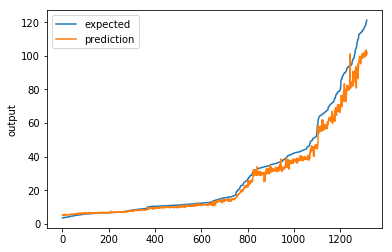

In [82]:
from sklearn import metrics

pred_train = model_relu_adam.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train,y_train))
print("Score_relu_adam_train (RMSE): {}".format(score_train))

pred_test = model_relu_adam.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test,y_test))
print("Score_relu_adam_test (RMSE): {}".format(score_test))

#chart_regression(pred.flatten(),y_lstm_seq_test, sort=True)
chart_regression(pred_train.flatten(),y_train, sort=True)
chart_regression(pred_test.flatten(),y_test, sort=True)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

print('Build model...')
model_sigmoid = Sequential()

model_sigmoid.add(LSTM(34,dropout=0.1, recurrent_dropout=0.1, activation = 'sigmoid', input_shape=(SEQUENCE_SIZE, 5),return_sequences=True))
model_sigmoid.add(LSTM(34,dropout=0.1, recurrent_dropout=0.1, activation = 'sigmoid'))
model_sigmoid.add(Dense(16))
model_sigmoid.add(Dense(16))
model_sigmoid.add(Dense(1))

model_sigmoid.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')

model_sigmoid.fit(X_train,y_train,validation_data=(X_test,y_test), callbacks=[monitor],verbose=2,epochs = 1000)

Build model...
Train...
Train on 3069 samples, validate on 1316 samples
Epoch 1/1000
3069/3069 - 26s - loss: 1331.4321 - val_loss: 857.3822
Epoch 2/1000
3069/3069 - 4s - loss: 894.1951 - val_loss: 824.0924
Epoch 3/1000
3069/3069 - 4s - loss: 742.4507 - val_loss: 455.8662
Epoch 4/1000
3069/3069 - 4s - loss: 242.0397 - val_loss: 36.8328
Epoch 5/1000
3069/3069 - 4s - loss: 61.6350 - val_loss: 20.3521
Epoch 6/1000
3069/3069 - 4s - loss: 53.8695 - val_loss: 11.7483
Epoch 7/1000
3069/3069 - 4s - loss: 48.6724 - val_loss: 9.7638
Epoch 8/1000
3069/3069 - 4s - loss: 41.3774 - val_loss: 9.9191
Epoch 9/1000
3069/3069 - 4s - loss: 39.9771 - val_loss: 5.3713
Epoch 10/1000
3069/3069 - 4s - loss: 37.7163 - val_loss: 5.2269
Epoch 11/1000
3069/3069 - 4s - loss: 35.2060 - val_loss: 4.4304
Epoch 12/1000
3069/3069 - 4s - loss: 31.7697 - val_loss: 3.4229
Epoch 13/1000
3069/3069 - 4s - loss: 32.2833 - val_loss: 6.9594
Epoch 14/1000
3069/3069 - 4s - loss: 32.3978 - val_loss: 14.2235
Epoch 15/1000
3069/3069 -

Score_sigmoid_adam_train (RMSE): 2.0125792026519775
Score_sigmoid_adam_test (RMSE): 1.9980888366699219


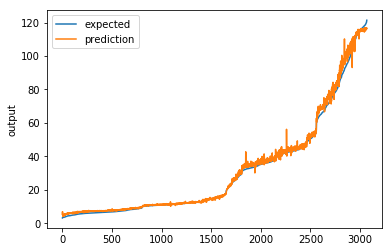

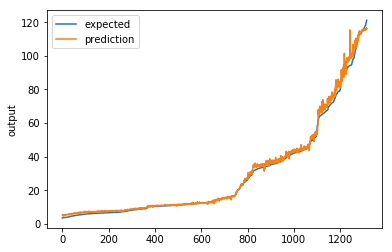

In [77]:
from sklearn import metrics

pred_train = model_sigmoid.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train,y_train))
print("Score_sigmoid_adam_train (RMSE): {}".format(score_train))

pred_test = model_sigmoid.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test,y_test))
print("Score_sigmoid_adam_test (RMSE): {}".format(score_test))

#chart_regression(pred.flatten(),y_lstm_seq_test, sort=True)
chart_regression(pred_train.flatten(),y_train, sort=True)
chart_regression(pred_test.flatten(),y_test, sort=True)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

print('Build model...')
model_tanh_adam = Sequential()

model_tanh_adam.add(LSTM(34,dropout=0.1, recurrent_dropout=0.1, activation = 'tanh', input_shape=(SEQUENCE_SIZE, 5)))
model_tanh_adam.add(Dense(16))
model_tanh_adam.add(Dense(16))
model_tanh_adam.add(Dense(1))

model_tanh_adam.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')

model_tanh_adam.fit(X_train,y_train,validation_data=(X_test,y_test), callbacks=[monitor],verbose=2,epochs = 1000)

Build model...
Train...
Train on 3069 samples, validate on 1316 samples
Epoch 1/1000
3069/3069 - 3s - loss: 1254.1669 - val_loss: 168.4302
Epoch 2/1000
3069/3069 - 1s - loss: 75.9707 - val_loss: 7.3588
Epoch 3/1000
3069/3069 - 1s - loss: 35.4208 - val_loss: 4.4041
Epoch 4/1000
3069/3069 - 1s - loss: 32.0816 - val_loss: 3.1223
Epoch 5/1000
3069/3069 - 1s - loss: 26.6175 - val_loss: 2.7570
Epoch 6/1000
3069/3069 - 1s - loss: 32.1290 - val_loss: 2.5675
Epoch 7/1000
3069/3069 - 1s - loss: 23.9995 - val_loss: 7.8926
Epoch 8/1000
3069/3069 - 1s - loss: 24.1079 - val_loss: 3.2209
Epoch 9/1000
3069/3069 - 1s - loss: 25.3262 - val_loss: 2.3139
Epoch 10/1000
3069/3069 - 1s - loss: 23.2664 - val_loss: 2.2292
Epoch 11/1000
3069/3069 - 1s - loss: 23.6631 - val_loss: 2.8592
Epoch 12/1000
3069/3069 - 1s - loss: 18.9771 - val_loss: 1.8191
Epoch 13/1000
3069/3069 - 1s - loss: 17.8395 - val_loss: 2.2606
Epoch 14/1000
3069/3069 - 1s - loss: 18.7938 - val_loss: 6.8940
Epoch 15/1000
3069/3069 - 1s - loss: 

Score_tanh_adam_train (RMSE): 2.1306040287017822
Score_tanh_adam_test (RMSE): 2.0779974460601807


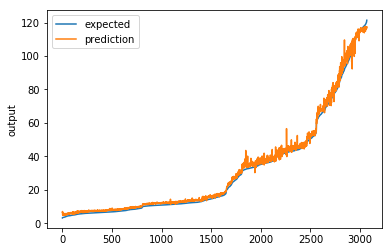

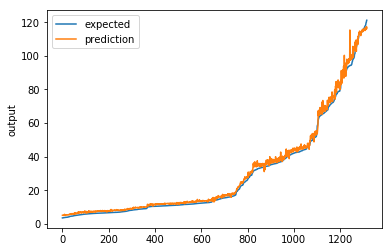

In [78]:
from sklearn import metrics

pred_train = model_tanh_adam.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train,y_train))
print("Score_tanh_adam_train (RMSE): {}".format(score_train))

pred_test = model_tanh_adam.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test,y_test))
print("Score_tanh_adam_test (RMSE): {}".format(score_test))

#chart_regression(pred.flatten(),y_lstm_seq_test, sort=True)
chart_regression(pred_train.flatten(),y_train, sort=True)
chart_regression(pred_test.flatten(),y_test, sort=True)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras import optimizers


Constant = initializers.Constant(value=0)
print('Build model...')
model_sgd_relu = Sequential()
model_sgd_relu.add(LSTM(10,dropout=0.5, recurrent_dropout=0.1, activation = 'relu',kernel_initializer = Constant, input_shape=(SEQUENCE_SIZE, 5)))
#model_sgd_relu.add(LSTM(34,dropout=0.1, recurrent_dropout=0.1, activation = 'relu',return_sequences=True))
#model_sgd_relu.add(LSTM(20,dropout=0.1, recurrent_dropout=0.1, activation = 'relu'))
#model_sgd_relu.add(Dense(16))
model_sgd_relu.add(Dense(10))
model_sgd_relu.add(Dense(1))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.3, nesterov=True)
model_sgd_relu.compile(loss='mean_squared_error', optimizer= sgd)

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')

model_sgd_relu.fit(X_train,y_train,validation_data=(X_test,y_test), callbacks=[monitor],batch_size =128,verbose=2,epochs = 1000)

Build model...
Train...
Train on 3069 samples, validate on 1316 samples
Epoch 1/1000
3069/3069 - 17s - loss: 1029.5392 - val_loss: 859.8737
Epoch 2/1000
3069/3069 - 1s - loss: 925.8468 - val_loss: 856.1280
Epoch 3/1000
3069/3069 - 1s - loss: 919.2921 - val_loss: 880.7765
Epoch 4/1000
3069/3069 - 1s - loss: 926.9728 - val_loss: 998.8580
Epoch 5/1000
3069/3069 - 1s - loss: 926.5906 - val_loss: 891.5856
Epoch 6/1000
3069/3069 - 1s - loss: 934.8623 - val_loss: 859.6290
Epoch 7/1000
3069/3069 - 1s - loss: 927.1701 - val_loss: 855.9014
Epoch 8/1000
3069/3069 - 1s - loss: 924.5830 - val_loss: 861.5682
Epoch 9/1000
3069/3069 - 1s - loss: 931.6132 - val_loss: 902.2783
Epoch 10/1000
3069/3069 - 1s - loss: 930.7969 - val_loss: 879.7422
Epoch 11/1000
3069/3069 - 1s - loss: 920.2509 - val_loss: 893.0683
Epoch 12/1000
3069/3069 - 1s - loss: 929.5258 - val_loss: 855.8553
Epoch 13/1000
3069/3069 - 1s - loss: 920.4175 - val_loss: 858.9329
Epoch 14/1000
3069/3069 - 1s - loss: 935.7067 - val_loss: 865.09

Score_sgd_relu_train (RMSE): 30.589622497558594
Score_sgd_relu_test (RMSE): 29.437288284301758


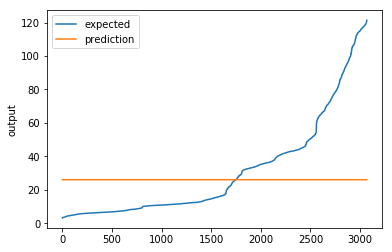

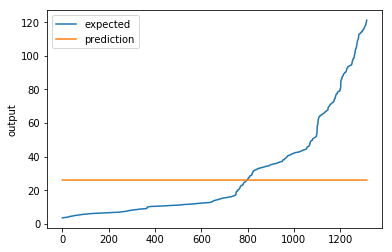

In [79]:
from sklearn import metrics

pred_train = model_sgd_relu.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train,y_train))
print("Score_sgd_relu_train (RMSE): {}".format(score_train))

pred_test = model_sgd_relu.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test,y_test))
print("Score_sgd_relu_test (RMSE): {}".format(score_test))

#chart_regression(pred.flatten(),y_lstm_seq_test, sort=True)
chart_regression(pred_train.flatten(),y_train, sort=True)
chart_regression(pred_test.flatten(),y_test, sort=True)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras import optimizers

print('Build model...')
model_sgd_sigmoid = Sequential()

model_sgd_sigmoid.add(LSTM(16,dropout=0.1, recurrent_dropout=0.1, activation = 'sigmoid', input_shape=(SEQUENCE_SIZE, 5)))
#model_sgd_relu.add(Dense(16))
model_sgd_sigmoid.add(Dense(10))
model_sgd_sigmoid.add(Dense(1))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.3, nesterov=True)
model_sgd_sigmoid.compile(loss='mean_squared_error', optimizer= sgd)

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')

model_sgd_sigmoid.fit(X_train,y_train,validation_data=(X_test,y_test), callbacks=[monitor],batch_size =128,verbose=2,epochs = 1000)

Build model...
Train...
Train on 3069 samples, validate on 1316 samples
Epoch 1/1000
3069/3069 - 17s - loss: 1006.5088 - val_loss: 660.3490
Epoch 2/1000
3069/3069 - 1s - loss: 353.0070 - val_loss: 453.6844
Epoch 3/1000
3069/3069 - 1s - loss: 294.9835 - val_loss: 103.5484
Epoch 4/1000
3069/3069 - 1s - loss: 208.3757 - val_loss: 303.9093
Epoch 5/1000
3069/3069 - 1s - loss: 75.9452 - val_loss: 195.2219
Epoch 6/1000
3069/3069 - 1s - loss: 138.7695 - val_loss: 35.3707
Epoch 7/1000
3069/3069 - 1s - loss: 97.5003 - val_loss: 81.5769
Epoch 8/1000
3069/3069 - 1s - loss: 91.1364 - val_loss: 13.5551
Epoch 9/1000
3069/3069 - 1s - loss: 96.1811 - val_loss: 12.3061
Epoch 10/1000
3069/3069 - 1s - loss: 49.5724 - val_loss: 84.5680
Epoch 11/1000
3069/3069 - 1s - loss: 83.8331 - val_loss: 3.6344
Epoch 12/1000
3069/3069 - 1s - loss: 69.7611 - val_loss: 29.9171
Epoch 13/1000
3069/3069 - 1s - loss: 42.1674 - val_loss: 20.9565
Epoch 14/1000
3069/3069 - 1s - loss: 62.6688 - val_loss: 24.3137
Epoch 15/1000
30

Score_sgd_sigmoid_train (RMSE): 7.602453231811523
Score_sgd_sigmoid_test (RMSE): 7.175408363342285


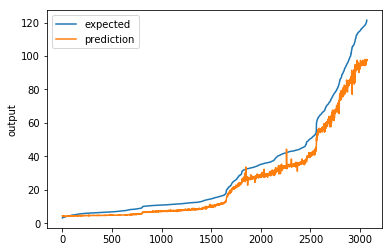

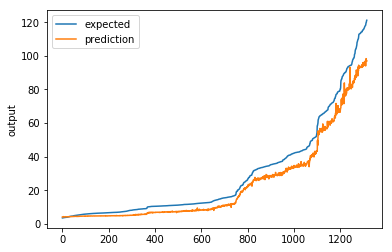

In [80]:
from sklearn import metrics

pred_train = model_sgd_sigmoid.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train,y_train))
print("Score_sgd_sigmoid_train (RMSE): {}".format(score_train))

pred_test = model_sgd_sigmoid.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test,y_test))
print("Score_sgd_sigmoid_test (RMSE): {}".format(score_test))

#chart_regression(pred.flatten(),y_lstm_seq_test, sort=True)
chart_regression(pred_train.flatten(),y_train, sort=True)
chart_regression(pred_test.flatten(),y_test, sort=True)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras import optimizers

print('Build model...')
model_sgd_tanh = Sequential()
#Constant = initializers.Constant(value=0)
model_sgd_tanh.add(LSTM(16,dropout=0.1, recurrent_dropout=0.1, activation = 'tanh',kernel_initializer = 'RandomUniform', input_shape=(SEQUENCE_SIZE, 5)))
#model_sgd_relu.add(Dense(16))
model_sgd_tanh.add(Dense(10))
model_sgd_tanh.add(Dense(1))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.3, nesterov=True)
model_sgd_tanh.compile(loss='mean_squared_error', optimizer= sgd)

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')

model_sgd_tanh.fit(X_train,y_train,validation_data=(X_test,y_test), callbacks=[monitor],batch_size =32,verbose=2,epochs = 1000)

Build model...
Train...
Train on 3069 samples, validate on 1316 samples
Epoch 1/1000
3069/3069 - 20s - loss: nan - val_loss: nan
Epoch 2/1000
3069/3069 - 2s - loss: nan - val_loss: nan
Epoch 3/1000
3069/3069 - 2s - loss: nan - val_loss: nan
Epoch 4/1000
3069/3069 - 2s - loss: nan - val_loss: nan
Epoch 5/1000
3069/3069 - 2s - loss: nan - val_loss: nan
Epoch 00005: early stopping


In [48]:
from sklearn import metrics

pred_train = model_sgd_tanh.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train,y_train))
print("Score (RMSE): {}".format(score_train))

pred_test = model_sgd_tanh.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test,y_test))
print("Score (RMSE): {}".format(score_test))

#chart_regression(pred.flatten(),y_lstm_seq_test, sort=True)
chart_regression(pred_train.flatten(),y_train, sort=True)
chart_regression(pred_test.flatten(),y_test, sort=True)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').